### Houseprice Prediction
In this file we will be dealing with advance house price prediction dataset which is borrowed from kaggle. We will be predicting SalePrice column using other 80 columns. The dimensions of dataset are 1460X81. Let us proceed with our EDA

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# The following line is used to display all the columns while examining the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv("housingtrain.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values
Let us start our EDA by looking for missing values. The following code analyzes how many columns has null value and what percentage of those columns are null values. Besides we also analyze how the salesprices alter with respect to these columns having null values

In [3]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
for feature in features_with_na:
    print("The percentage of null values in {} is {}".format(feature,round(df[feature].isnull().sum()/len(df[feature]),4)))

The percentage of null values in LotFrontage is 0.1774
The percentage of null values in Alley is 0.9377
The percentage of null values in MasVnrType is 0.0055
The percentage of null values in MasVnrArea is 0.0055
The percentage of null values in BsmtQual is 0.0253
The percentage of null values in BsmtCond is 0.0253
The percentage of null values in BsmtExposure is 0.026
The percentage of null values in BsmtFinType1 is 0.0253
The percentage of null values in BsmtFinType2 is 0.026
The percentage of null values in FireplaceQu is 0.4726
The percentage of null values in GarageType is 0.0555
The percentage of null values in GarageYrBlt is 0.0555
The percentage of null values in GarageFinish is 0.0555
The percentage of null values in GarageQual is 0.0555
The percentage of null values in GarageCond is 0.0555
The percentage of null values in PoolQC is 0.9952
The percentage of null values in Fence is 0.8075
The percentage of null values in MiscFeature is 0.963


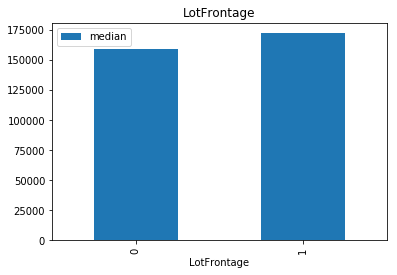

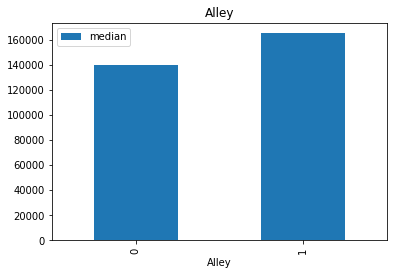

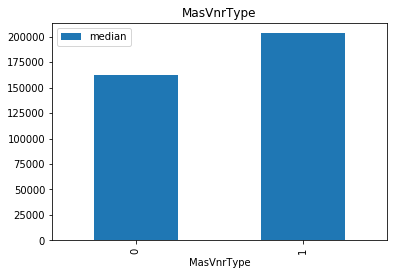

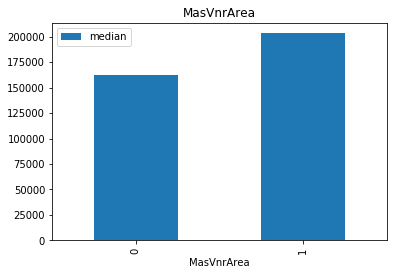

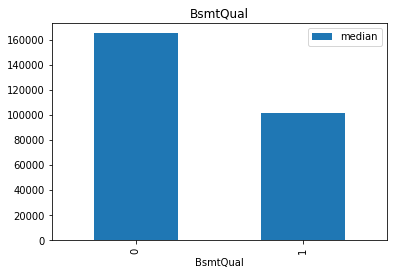

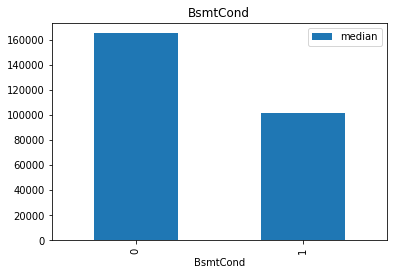

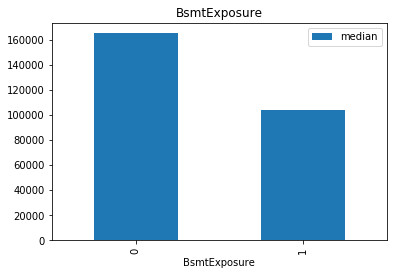

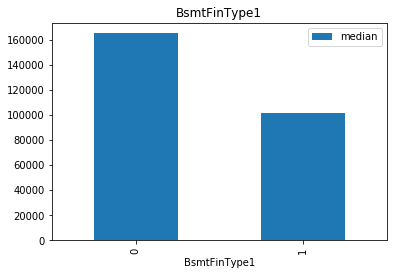

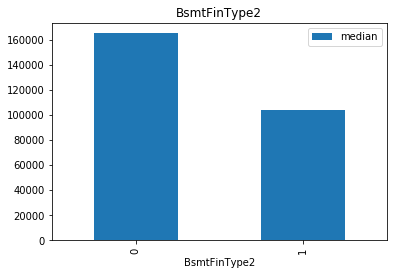

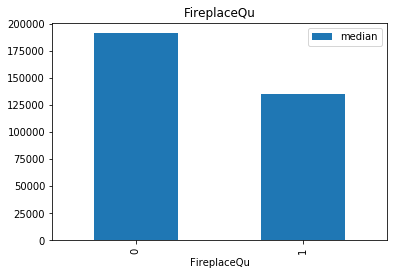

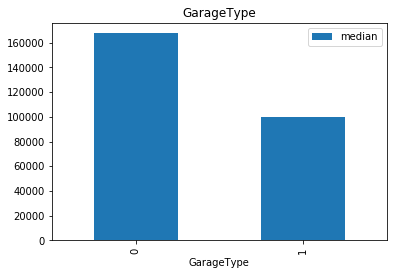

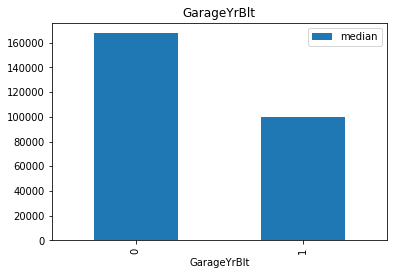

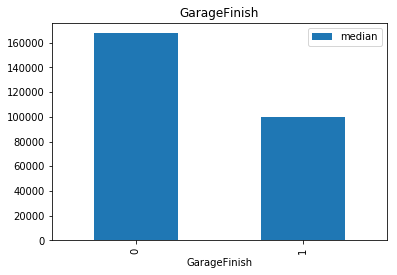

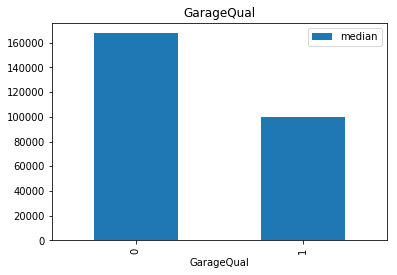

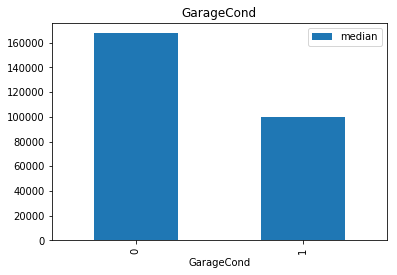

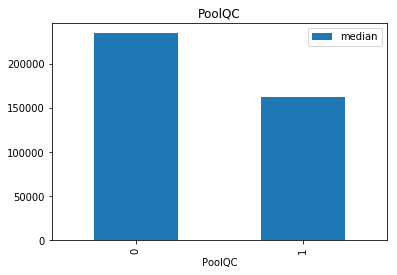

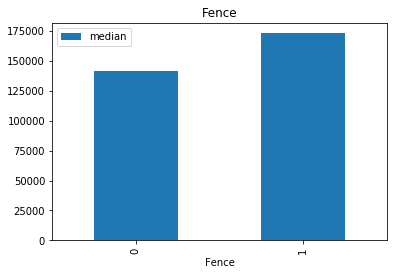

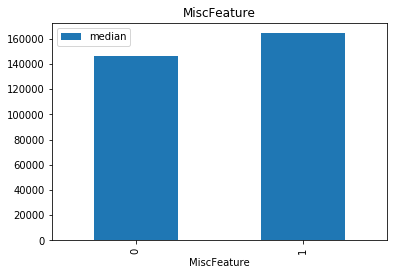

In [5]:
for feature in features_with_na:
    df1=df.copy()
    df1[feature]=np.where(df1[feature].isnull(),1,0)
    df1.groupby([feature])['SalePrice'].agg(['median']).plot.bar()
    plt.title(feature)
    plt.show()

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### Miscellaneous Columns
This includes all the columns that does not add any value to our analysis like ID in this case. This is obviously a miscellaneous column and can be dropped straight away

In [7]:
misc_list=['Id']
len(df['Id'].unique())

1460

In [8]:
df.drop('Id',axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Numerical Variables
Let us explore all the numerical variables

In [9]:
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
num_features=[feature for feature in df.columns if(is_numeric_dtype(df[feature]))]
df[num_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables
In this section we will explore all the datetime variables which are designated as numeric variables. The datetime variables can't be treated as conventional numeric variables as these variables have some more information encompasses in them

In [10]:
import re
patterns='Y\w+'
#regexp = re.search(r'\Y*')
temp_features=[feature for feature in num_features if re.search(patterns,feature)]
temp_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

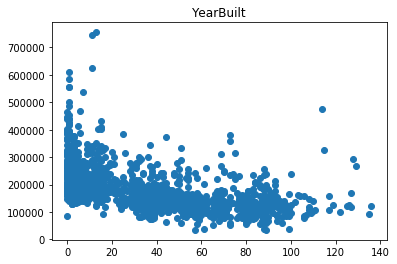

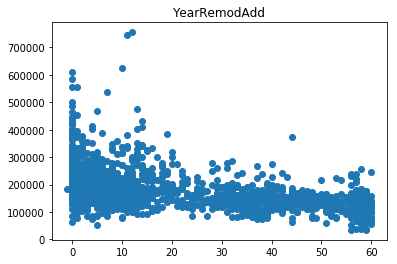

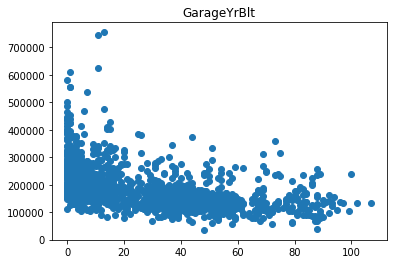

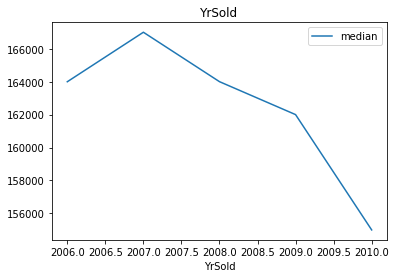

In [11]:
for feature in temp_features:
    df1=df.copy()
    if(feature=='YrSold'):
        df1.groupby([feature])['SalePrice'].agg(['median']).plot()
        plt.title(feature)
        plt.show()
    else:
        df1[feature]=df1['YrSold']-df1[feature]
        plt.scatter(df1[feature],df1['SalePrice'])
        plt.title(feature)
        plt.show()

#### Discrete Numerical Variables

Let us designate the numerical values which has length less than 25 as discrete numeric variables

In [12]:
disc_num_list=[feature for feature in num_features if len(df[feature].unique())<25 and feature not in temp_features]
df[disc_num_list].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


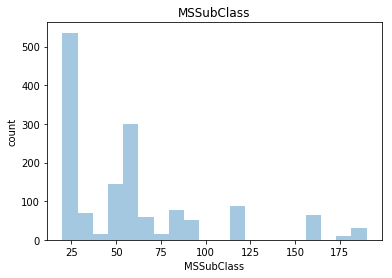

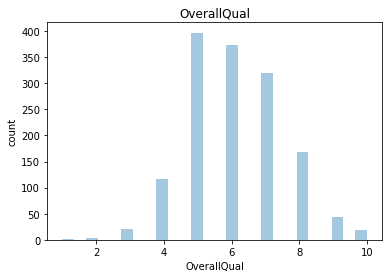

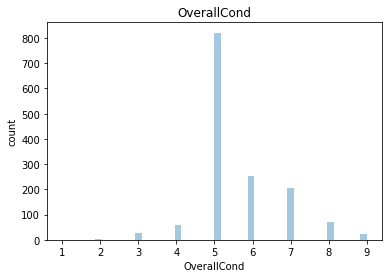

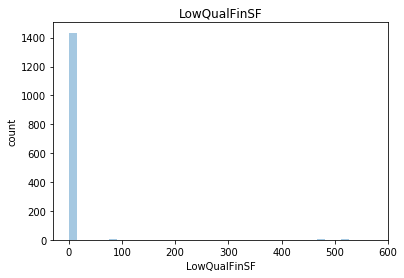

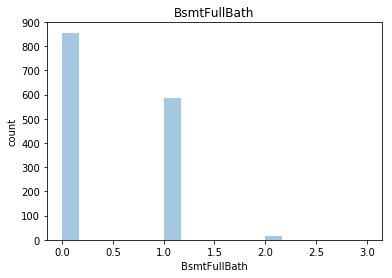

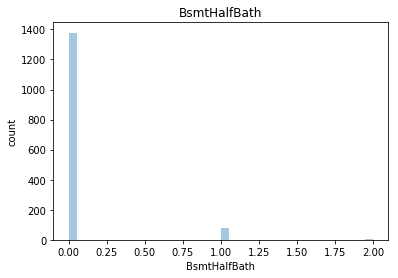

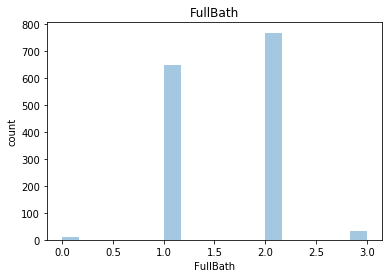

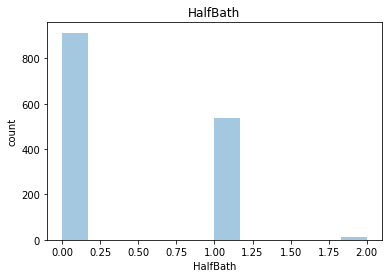

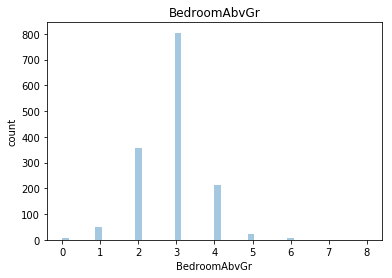

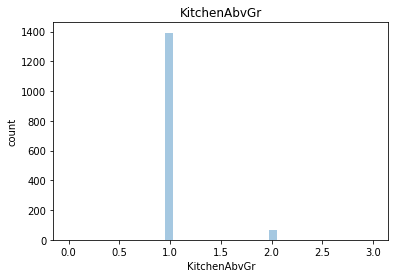

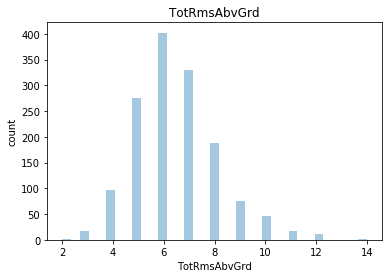

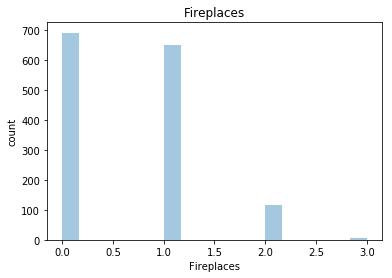

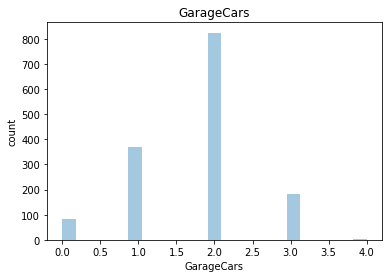

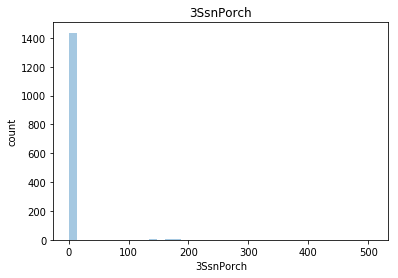

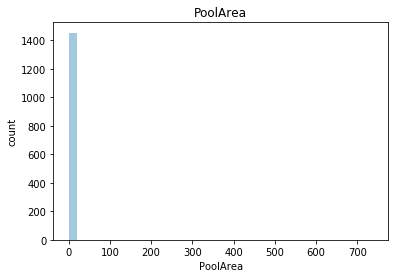

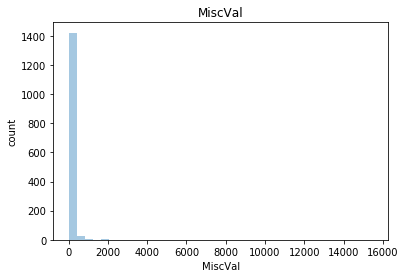

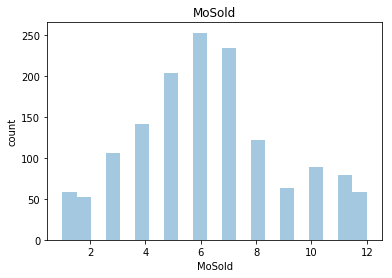

In [13]:
for feature in disc_num_list:
    sns.distplot(df[feature],hist=True,kde=False)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

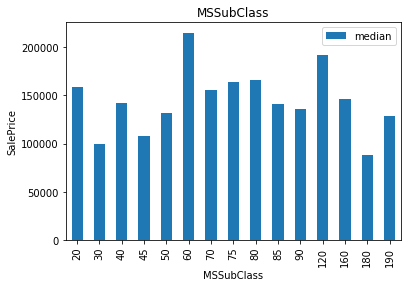

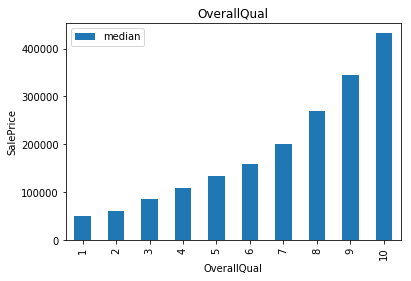

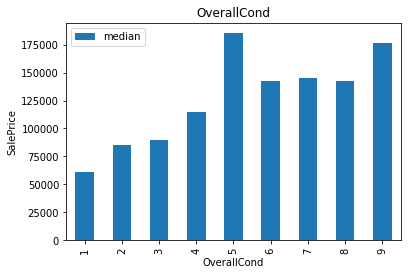

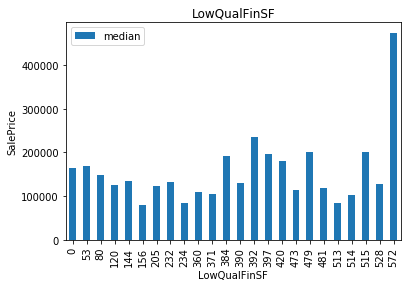

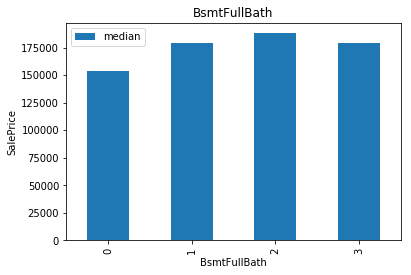

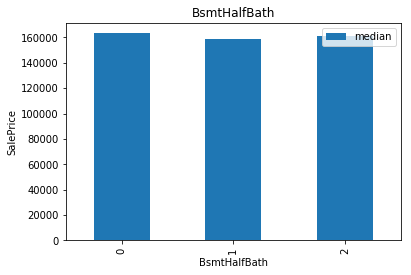

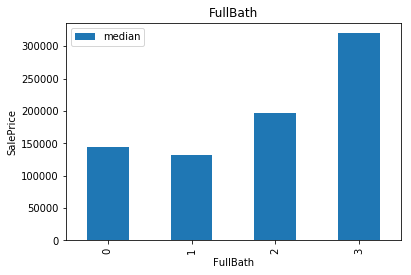

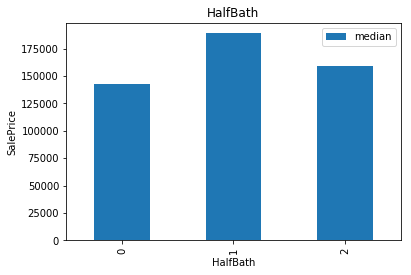

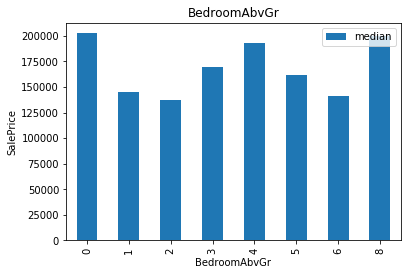

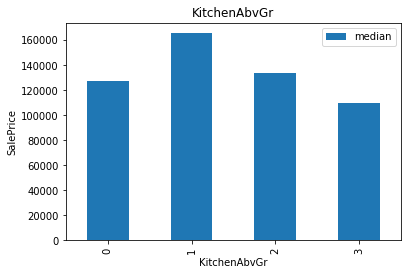

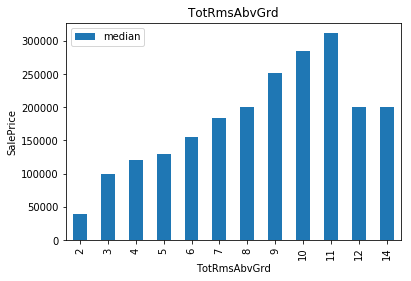

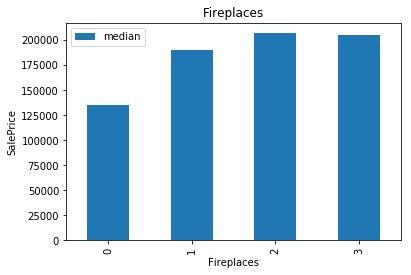

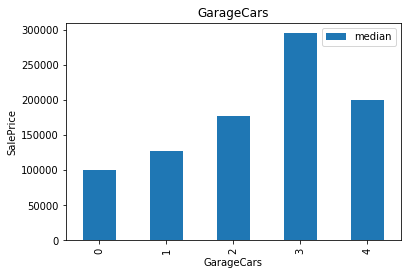

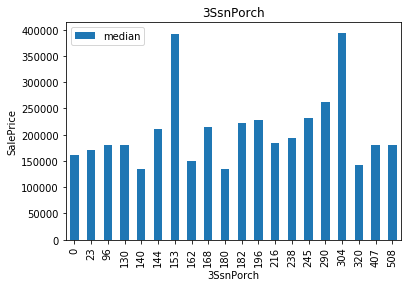

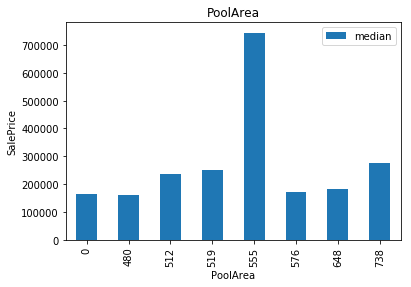

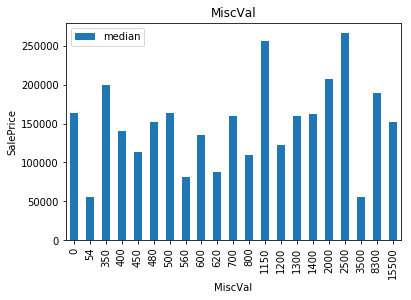

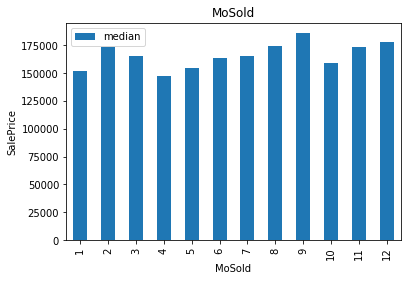

In [14]:
for feature in disc_num_list:
    df1=df.copy()
    df1.groupby(feature)['SalePrice'].agg(['median']).plot.bar()
    #sns.distplot(df[feature],hist=True,kde=False)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

#### Continuous Numerical Variables
In this section we will explore the continuous numerical variables through some histograms

In [15]:
cont_num_list=[feature for feature in num_features if feature not in disc_num_list and feature not in temp_features] 
df[cont_num_list].shape

(1460, 16)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


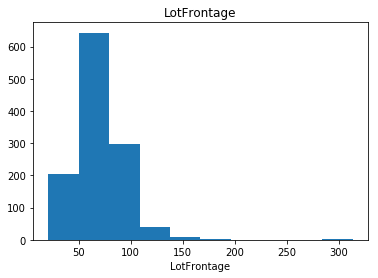

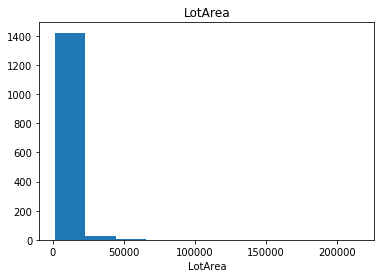

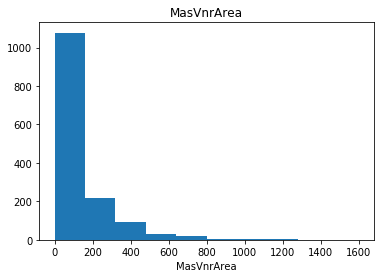

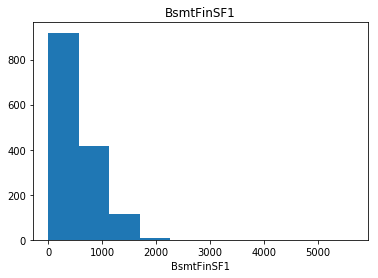

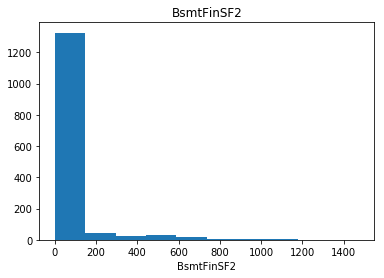

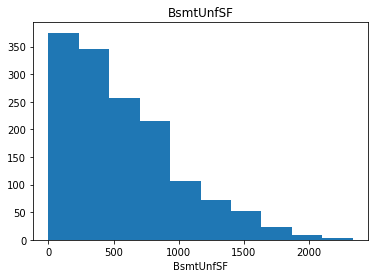

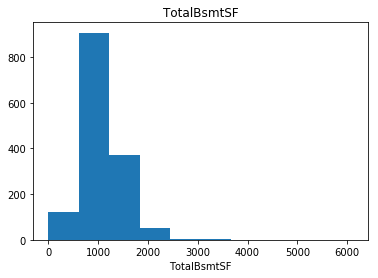

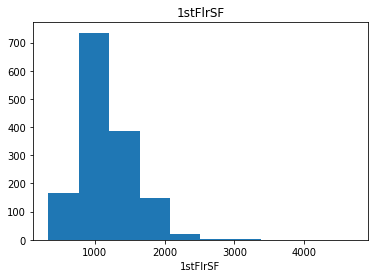

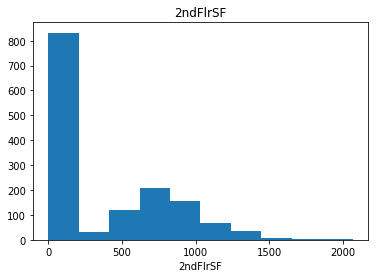

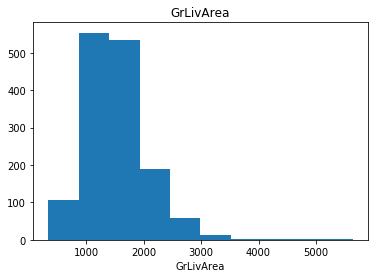

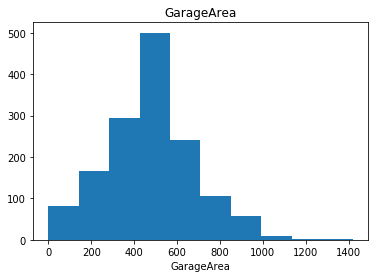

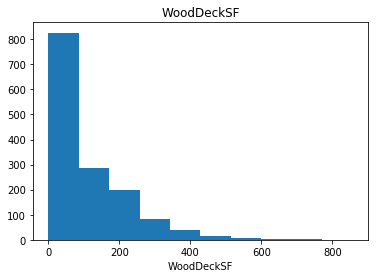

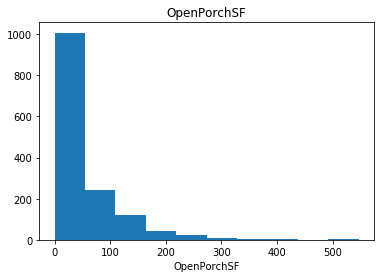

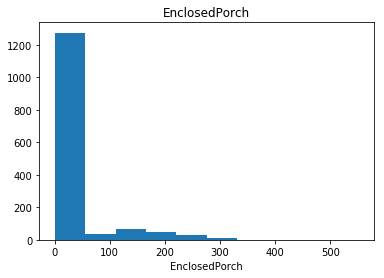

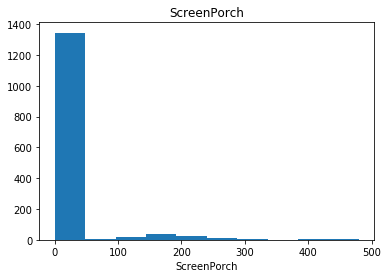

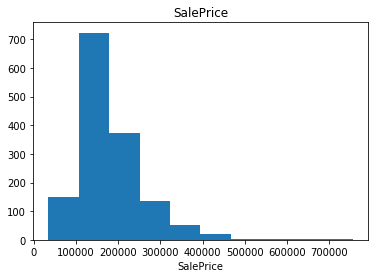

In [16]:
for feature in cont_num_list:
    df1=df.copy()
    plt.hist(df1[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

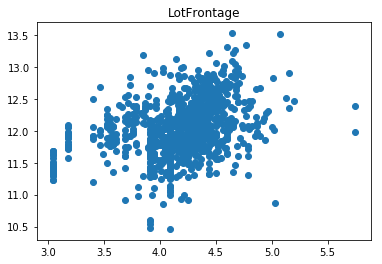

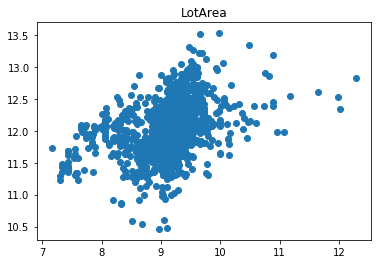

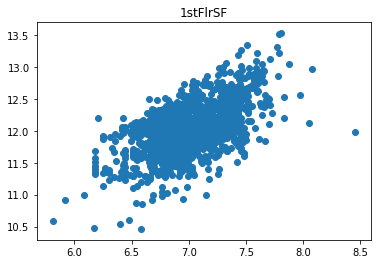

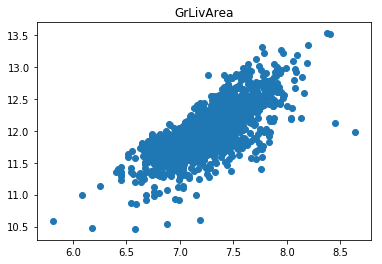

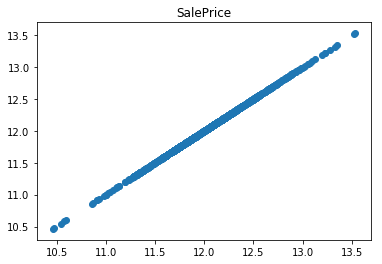

In [17]:
for feature in cont_num_list:
    if 0 in df[feature].unique():
        pass
    else:
        plt.scatter(np.log(df[feature]),np.log(df['SalePrice']))
        plt.title(feature)
        plt.show()

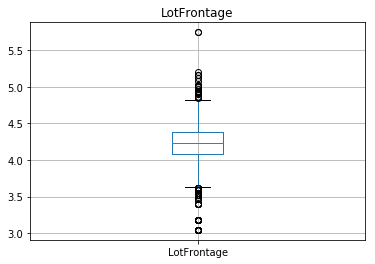

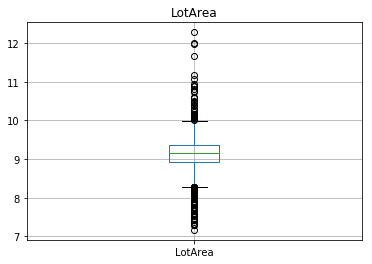

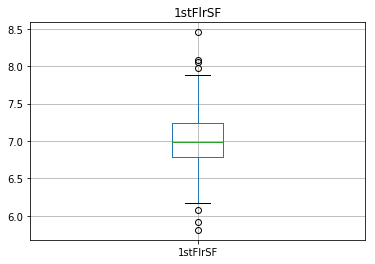

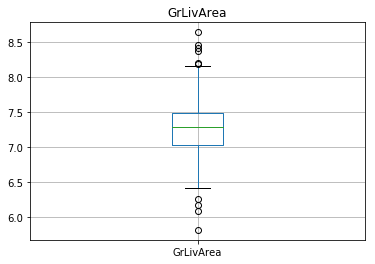

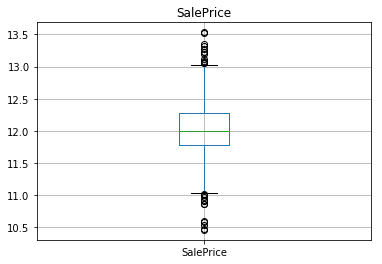

In [18]:
for feature in cont_num_list:
    df1=df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature]=np.log(df1[feature])
        df1.boxplot(column=feature)
        plt.title(feature)
        plt.show()

### Outliers

In [19]:
from pandas.api.types import is_float_dtype
from collections import defaultdict
#from scipy.stats import iqr
outliers=defaultdict(list)
num_list=list()
for col in df.columns:
    if(is_float_dtype(df[col])):
        num_list.append(col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #q75, q25 = iqr(df[col])
        #iqr = q75 - q25
        #print(col, ":" ,IQR)
        #for i in range(0,len(num_list)+1):
        for index, row in df.iterrows():
            if((row[col]<(Q1-3*IQR)) or (row[col]>(Q3+3*IQR))):
                    outliers[col].append(row[col])
                #else:
                    
for key,values in outliers.items():
    print("The number of strong outliers present in {} is:{}".format(key,len(values)))
    for i in values:
        print(i)

The number of strong outliers present in LotFrontage is:12
174.0
174.0
150.0
144.0
149.0
313.0
168.0
182.0
160.0
152.0
313.0
153.0
The number of strong outliers present in MasVnrArea is:25
1031.0
1115.0
768.0
1129.0
748.0
922.0
1600.0
870.0
772.0
921.0
762.0
1170.0
894.0
673.0
860.0
1047.0
816.0
760.0
975.0
1378.0
766.0
788.0
796.0
705.0
731.0


### Categorical Variables

In [20]:
cat_features=[feature for feature in df.columns if(is_string_dtype(df[feature]))]
df[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
for feature in cat_features:
    print("The number of unique features in {} is:{}".format(feature,len(df[feature].unique())))

The number of unique features in MSZoning is:5
The number of unique features in Street is:2
The number of unique features in Alley is:3
The number of unique features in LotShape is:4
The number of unique features in LandContour is:4
The number of unique features in Utilities is:2
The number of unique features in LotConfig is:5
The number of unique features in LandSlope is:3
The number of unique features in Neighborhood is:25
The number of unique features in Condition1 is:9
The number of unique features in Condition2 is:8
The number of unique features in BldgType is:5
The number of unique features in HouseStyle is:8
The number of unique features in RoofStyle is:6
The number of unique features in RoofMatl is:8
The number of unique features in Exterior1st is:15
The number of unique features in Exterior2nd is:16
The number of unique features in MasVnrType is:5
The number of unique features in ExterQual is:4
The number of unique features in ExterCond is:5
The number of unique features in Fo

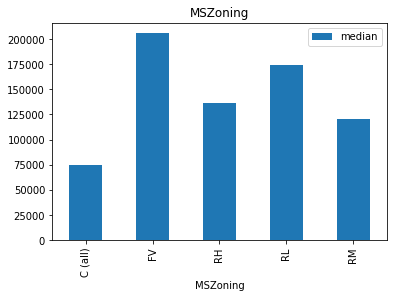

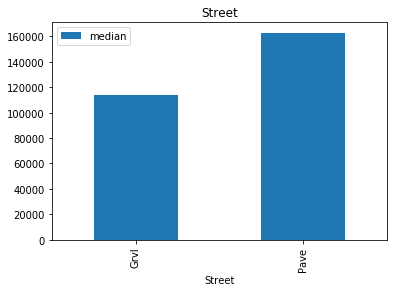

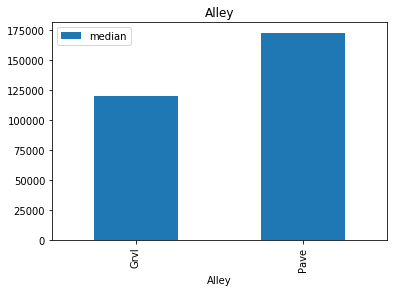

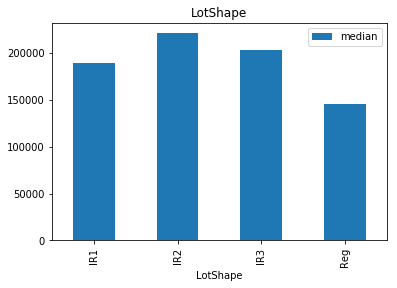

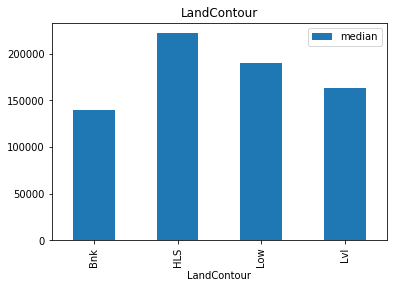

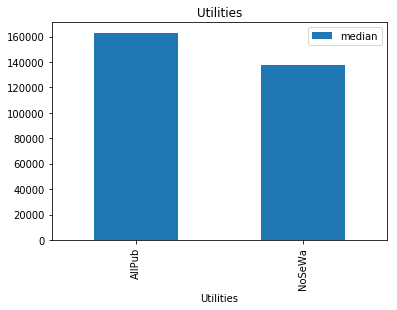

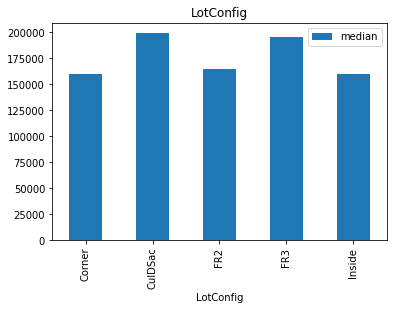

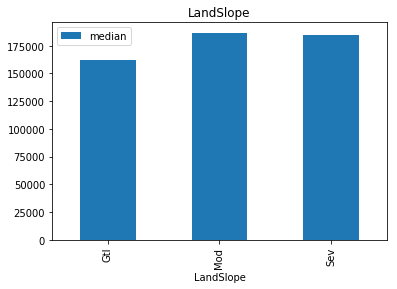

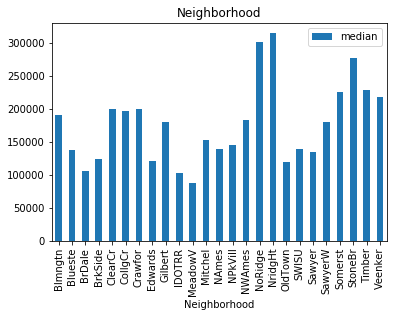

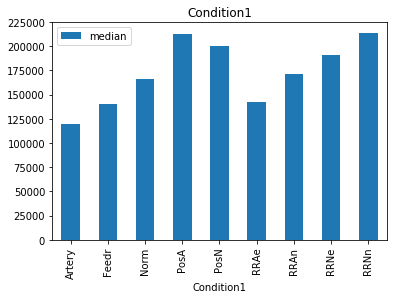

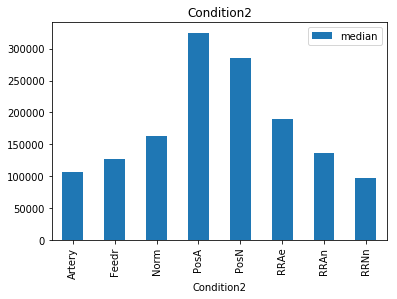

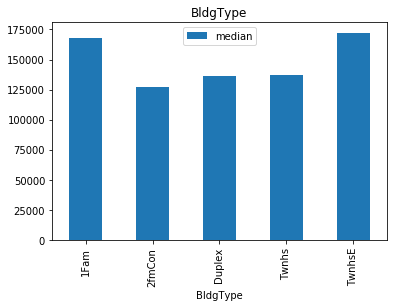

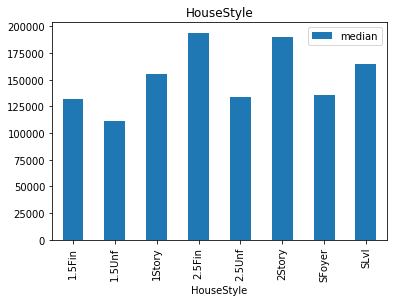

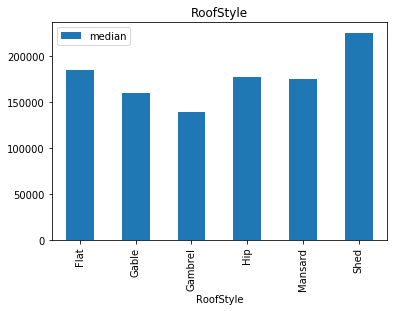

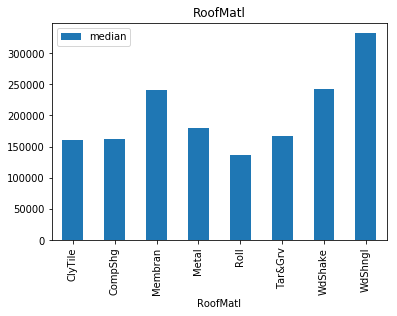

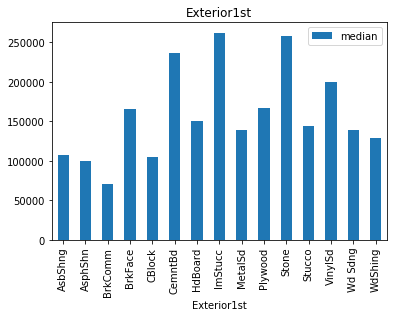

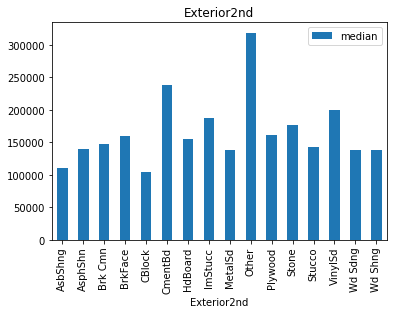

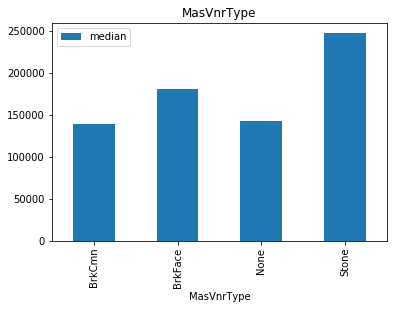

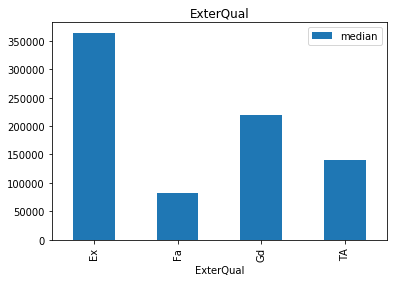

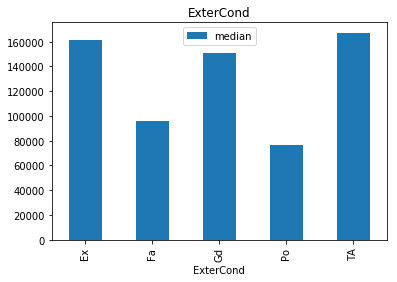

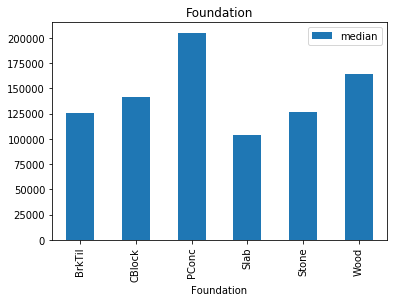

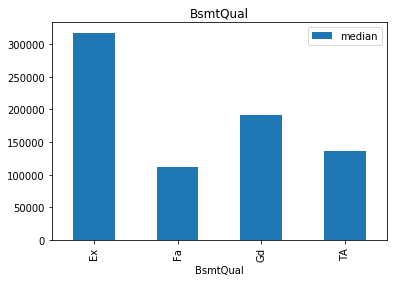

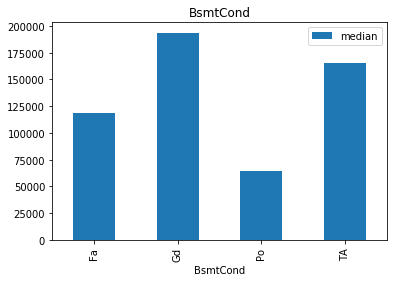

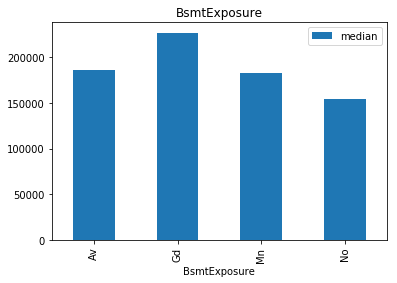

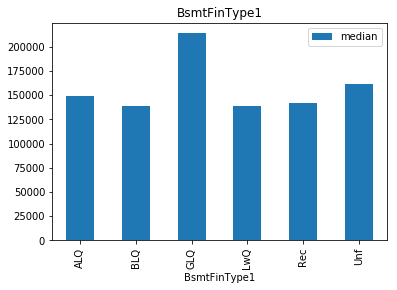

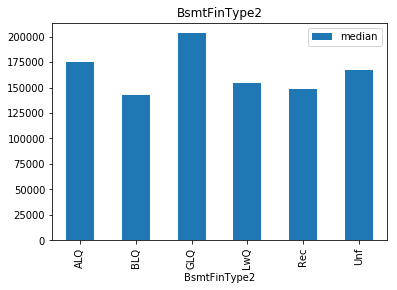

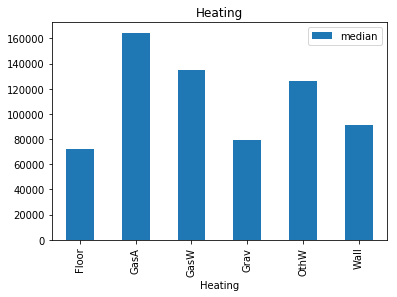

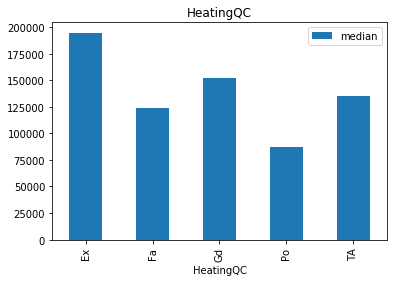

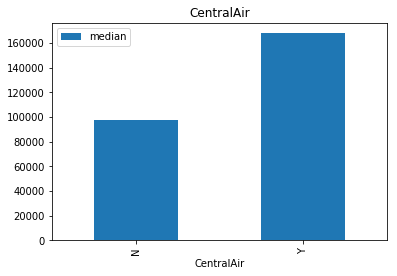

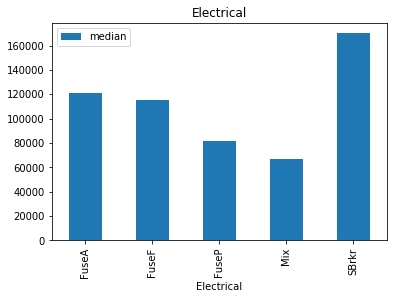

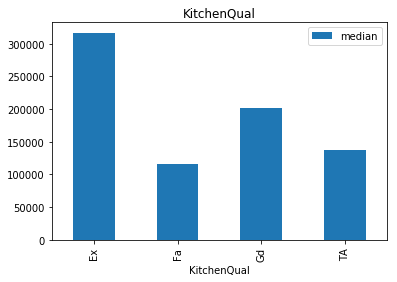

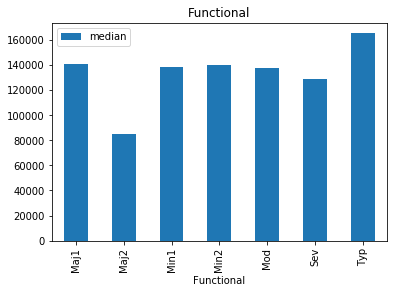

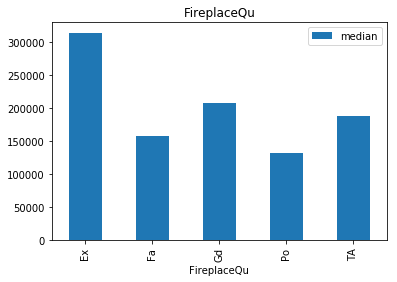

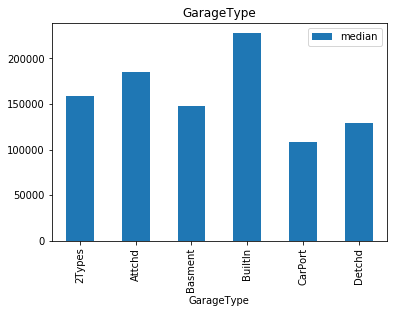

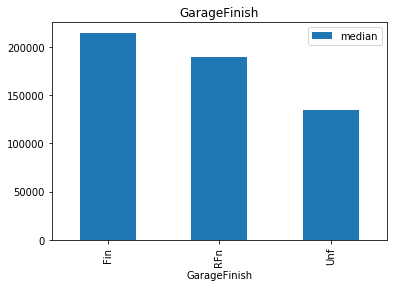

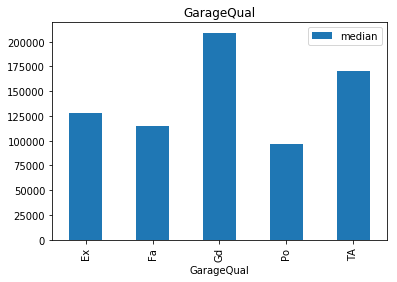

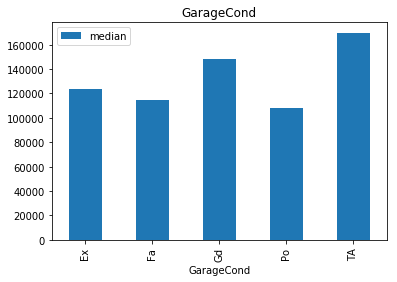

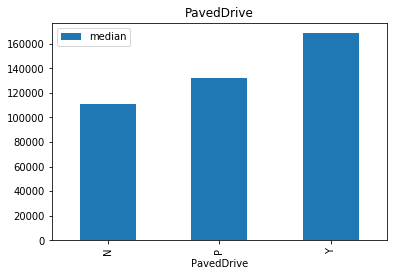

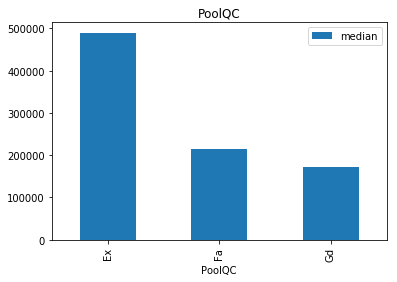

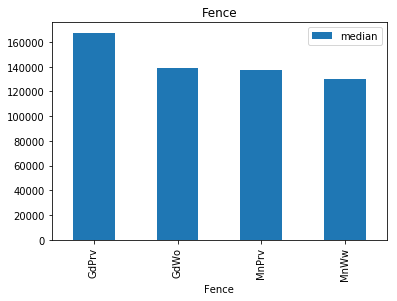

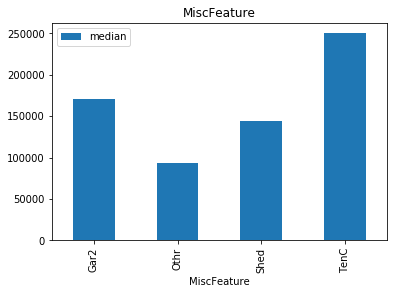

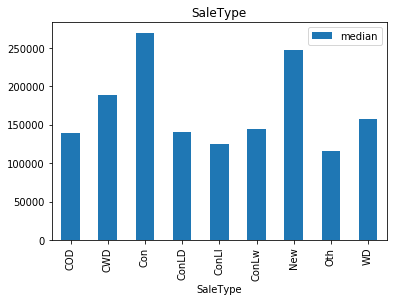

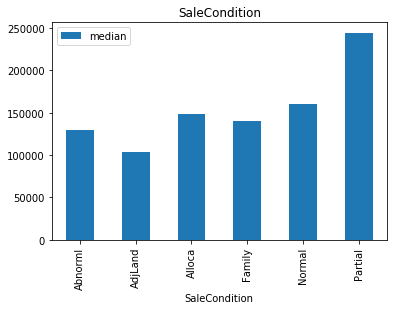

In [22]:
for feature in cat_features:
    df1=df.copy()
    df1.groupby(feature)['SalePrice'].agg(['median']).plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

### Handling Missing values in Categorical Variable
In this section we will be filling the missing values in categorical values as 'missing' adding one more leve; to the cardinality

In [23]:
cat_features_with_na=[feature for feature in cat_features if(df[feature].isnull().sum()>1)]
for feature in cat_features_with_na:
    print("The number of missing values in {} in {}".format(feature,df[feature].isnull().sum()/len(df[feature])))

The number of missing values in Alley in 0.9376712328767123
The number of missing values in MasVnrType in 0.005479452054794521
The number of missing values in BsmtQual in 0.025342465753424658
The number of missing values in BsmtCond in 0.025342465753424658
The number of missing values in BsmtExposure in 0.026027397260273973
The number of missing values in BsmtFinType1 in 0.025342465753424658
The number of missing values in BsmtFinType2 in 0.026027397260273973
The number of missing values in FireplaceQu in 0.4726027397260274
The number of missing values in GarageType in 0.05547945205479452
The number of missing values in GarageFinish in 0.05547945205479452
The number of missing values in GarageQual in 0.05547945205479452
The number of missing values in GarageCond in 0.05547945205479452
The number of missing values in PoolQC in 0.9952054794520548
The number of missing values in Fence in 0.8075342465753425
The number of missing values in MiscFeature in 0.963013698630137


### From the above we can see that four columns ['Alley','PoolQC','Fence','MiscFeature'] which has more than 75% NaN's. 
So it's better to delete these columns as these does not contribute more information in our dataset

In [24]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.shape

(1460, 76)

In [25]:
drop_list=['Alley','PoolQC','Fence','MiscFeature']
cat_features_with_na=[feature for feature in cat_features_with_na if feature not in drop_list]
cat_features_with_na

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [26]:
for feature in cat_features_with_na:
    df[feature].fillna('Missing',inplace=True)

In [27]:
df[cat_features_with_na].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Modifying Temporal Values

In [29]:
for feature in temp_features:
    #df1=df.copy()
    if(feature!='YrSold'):
        df[feature]=df['YrSold']-df[feature]
df[temp_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


### Dealing with missing values in Numerical Variables

In [31]:
num_features_with_na=[feature for feature in num_features if df[feature].isnull().sum()>1]
for feature in num_features_with_na:
    print("The number of missing values in {} is {}".format(feature,df[feature].isnull().sum()/len(df[feature])))

The number of missing values in LotFrontage is 0.1773972602739726
The number of missing values in MasVnrArea is 0.005479452054794521
The number of missing values in GarageYrBlt is 0.05547945205479452


#### For all the features which has NAN's replace them with Median and add a column which says either 1 or 0 in which 1 indicates the value is already present and 0 is that value is imputed through median

In [32]:
for feature in num_features_with_na:
    median=df[feature].median()
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature]=df[feature].fillna(median)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,0


#### Log Transform the variables as they are skewed

In [37]:
for feature in num_features:
    if(0 not in df[feature].unique()):
        df[feature]=np.log(df[feature])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,4.094345,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7.602401,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,Missing,Attchd,7.602401,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0.693147,7.604894,WD,Normal,12.247694,0,0,0
1,2.995732,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,7.588830,7.588830,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,7.588830,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,1.609438,7.604396,WD,Normal,12.109011,0,0,0
2,4.094345,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7.601402,7.601902,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,7.601402,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2.197225,7.604894,WD,Normal,12.317167,0,0,0
3,4.248495,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,7.557473,7.585789,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,7.599902,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0.693147,7.603898,WD,Abnorml,11.849398,0,0,0
4,4.094345,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,7.600902,7.600902,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,7.600902,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2.484907,7.604894,WD,Normal,12.429216,0,0,0


#### Replace the categories with less number i.e., replace the levels of category <1%  with some other category

In [41]:
cat_features=[feature for feature in cat_features if feature not in drop_list]

In [42]:
for feature in cat_features:
    #if(feature in cat)
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [43]:
def count_based_encoding(df):
    cat_list=list()
    a=list()
    for col in df.columns:
        if(is_string_dtype(df[col])):
            cat_list.append(col)
            a.append(dict(df[col].value_counts()))
    for key1,i in enumerate(a):
        for key2,col in enumerate(cat_list):
            if(is_string_dtype(df[col]) and key1==key2):
                df[col]=df[col].map(i)
    return df

In [44]:
df[cat_features]=count_based_encoding(df[cat_features])
df.head()

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,4.094345,1151,4.174387,9.041922,1454,925,1311,1459,1052,1382,150,1260,1445,1220,445,1.945910,1.609438,7.602401,7.602401,1141,1434,515,504,445,196.0,488,1282,647,618,1311,953,418,706,1256,0,150,856,1428,741,1365,1334,6.752270,854,0,7.444249,1,0,2,1,3,1,586,2.079442,1360,0,690,870,7.602401,422,2,548,1311,1326,1340,0,61,0,0,0,0,0,0.693147,7.604894,1267,1198,12.247694,0,0,0
1,2.995732,1151,4.382027,9.169518,1454,925,1311,1459,47,1382,22,81,1445,1220,726,1.791759,2.079442,7.588830,7.588830,1141,1434,220,214,864,0.0,906,1282,634,618,1311,134,220,978,1256,0,284,1262,1428,741,1365,1334,7.140453,0,0,7.140453,0,1,2,0,3,1,735,1.791759,1360,1,313,870,7.588830,422,2,460,1311,1326,1340,298,0,0,0,0,0,0,1.609438,7.604396,1267,1198,12.109011,0,0,0
2,4.094345,1151,4.219508,9.328123,1454,484,1311,1459,1052,1382,150,1260,1445,1220,445,1.945910,1.609438,7.601402,7.601902,1141,1434,515,504,445,162.0,488,1282,647,618,1311,114,418,486,1256,0,434,920,1428,741,1365,1334,6.824374,866,0,7.487734,1,0,2,1,3,1,586,1.791759,1360,1,313,870,7.601402,422,2,608,1311,1326,1340,0,42,0,0,0,0,0,2.197225,7.604894,1267,1198,12.317167,0,0,0
3,4.248495,1151,4.094345,9.164296,1454,484,1311,1459,263,1382,51,1260,1445,1220,445,1.945910,1.609438,7.557473,7.585789,1141,1434,206,38,864,0.0,906,1282,146,649,65,953,220,216,1256,0,540,756,1428,241,1365,1334,6.867974,756,0,7.448334,1,0,1,0,3,1,586,1.945910,1360,1,380,387,7.599902,605,3,642,1311,1326,1340,0,35,272,0,0,0,0,0.693147,7.603898,1267,101,11.849398,0,0,0
4,4.094345,1151,4.430817,9.565214,1454,484,1311,1459,47,1382,41,1260,1445,1220,445,2.079442,1.609438,7.600902,7.600902,1141,1434,515,504,445,350.0,488,1282,647,618,1311,221,418,655,1256,0,490,1145,1428,741,1365,1334,7.043160,1053,0,7.695303,1,0,2,1,4,1,586,2.197225,1360,1,313,870,7.600902,422,3,836,1311,1326,1340,192,84,0,0,0,0,0,2.484907,7.604894,1267,1198,12.429216,0,0,0
